In [24]:
import tensorflow.keras as K

print(K.__version__)

2.2.4-tf


In [14]:
# Single fully-connected neural layer as encoder and as decoder

from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [16]:
encoder = Model(input_img, encoded)

In [17]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [18]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [19]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [20]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 32us/sample - loss: 0.6939 - val_loss: 0.6938
Epoch 2/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.6937 - val_loss: 0.6937
Epoch 3/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.6936 - val_loss: 0.6935
Epoch 4/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.6934 - val_loss: 0.6934
Epoch 5/50
60000/60000 [==============================] - 1s 25us/sample - loss: 0.6933 - val_loss: 0.6932
Epoch 6/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.6932 - val_loss: 0.6931
Epoch 7/50
60000/60000 [==============================] - 2s 25us/sample - loss: 0.6930 - val_loss: 0.6930
Epoch 8/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.6929 - val_loss: 0.6928
Epoch 9/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.6928 - val_

In [25]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

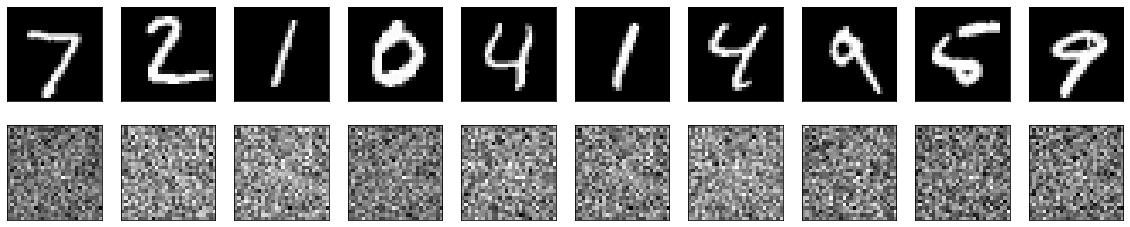

In [26]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [28]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 39us/sample - loss: 0.6936 - val_loss: 0.6936
Epoch 2/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6935 - val_loss: 0.6935
Epoch 3/100
60000/60000 [==============================] - 2s 33us/sample - loss: 0.6935 - val_loss: 0.6934
Epoch 4/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6934 - val_loss: 0.6933
Epoch 5/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6933 - val_loss: 0.6932
Epoch 6/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.6932 - val_loss: 0.6931
Epoch 7/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.6931 - val_loss: 0.6930
Epoch 8/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6930 - val_loss: 0.6929
Epoch 9/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.69

Epoch 76/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.6857 - val_loss: 0.6855
Epoch 77/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6855 - val_loss: 0.6853
Epoch 78/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6853 - val_loss: 0.6851
Epoch 79/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6851 - val_loss: 0.6850
Epoch 80/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6849 - val_loss: 0.6847
Epoch 81/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.6847 - val_loss: 0.6845
Epoch 82/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6845 - val_loss: 0.6843
Epoch 83/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6843 - val_loss: 0.6841
Epoch 84/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6841 - val_loss: 0.6839
Epoch 85/100
60000/

In [29]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [30]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [34]:
autoencoder.fit(x_train, x_train,
                epochs=150,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.2267 - val_loss: 0.2262
Epoch 2/150
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.2258 - val_loss: 0.2254
Epoch 3/150
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.2250 - val_loss: 0.2246
Epoch 4/150
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.2242 - val_loss: 0.2238
Epoch 5/150
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.2234 - val_loss: 0.2230
Epoch 6/150
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.2226 - val_loss: 0.2223
Epoch 7/150
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.2219 - val_loss: 0.2215
Epoch 8/150
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.2212 - val_loss: 0.2208
Epoch 9/150
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.22

60000/60000 [==============================] - 69s 1ms/sample - loss: 0.1928 - val_loss: 0.1925
Epoch 76/150
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.1925 - val_loss: 0.1922
Epoch 77/150
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.1922 - val_loss: 0.1919
Epoch 78/150
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.1919 - val_loss: 0.1916
Epoch 79/150
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.1916 - val_loss: 0.1913
Epoch 80/150
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.1914 - val_loss: 0.1910
Epoch 81/150
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.1911 - val_loss: 0.1908
Epoch 82/150
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.1908 - val_loss: 0.1905
Epoch 83/150
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.1906 - val_loss: 0.1902
Epoch 84/150
60000/60000 [======

Epoch 150/150
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.1772 - val_loss: 0.1766


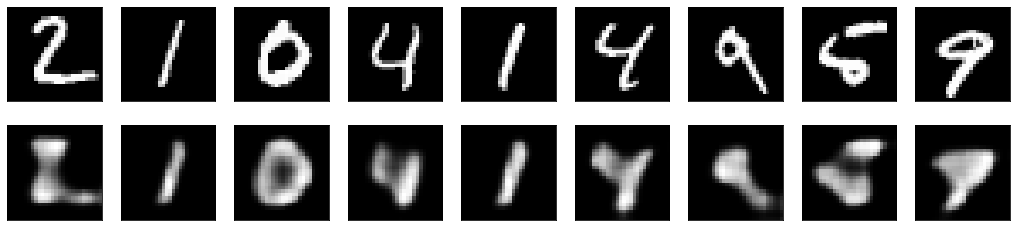

In [35]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()